<a href="https://colab.research.google.com/github/joaodeluca/Projeto-de-IA---1-Parte/blob/main/Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook: Análise Exploratória dos Dados Financeiros do S&P 500
# Projeto: Análise Automatizada dos Dados Financeiros do S&P 500
# Período: Dados atuais do S&P 500
#
# Integrantes:
#   Daniel Aloia Plastina - RA: 10375596
#   Gustavo Henrique Fernandes Vieira - RA: 10400715
#   João Victor Silva de Luca Gonçalves - RA: 10401977
#
# Histórico de Alterações:
#   17/03/2025 - [Daniel] Criação inicial do notebook; importação das bibliotecas e carregamento do dataset.
#   21/03/2025 - [Gustavo] Inclusão de análises exploratórias, estatísticas descritivas e verificação de dados faltantes.
#   25/03/2025 - [João] Implementação de visualizações (boxplot, scatter plot) e análise de outliers.
#   28/03/2025 - [João] Ajustes finais e normalização dos dados.
#
# Este notebook contém apenas a análise exploratória do dataset "constituents-financials_csv.csv" (S&P 500 Companies with Financial Information).

## 1. Importação das Bibliotecas
Nesta célula, importamos as bibliotecas essenciais para a análise exploratória dos dados.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
sns.set(style="whitegrid", context="talk")

## 2. Carregamento do Dataset

Carregamos o dataset **S&P 500 Companies with Financial Information** a partir do arquivo `constituents-financials_csv.csv`.

O dataset contém as seguintes colunas:
- **Symbol:** Código identificador da ação.
- **Name:** Nome completo da empresa.
- **Sector:** Setor de atuação da empresa.
- **Price:** Preço atual da ação.
- **Price/Earnings:** Relação entre o preço da ação e os lucros por ação.
- **Dividend Yield:** Percentual de dividendos pagos em relação ao preço da ação.
- **Earnings/Share:** Lucro por ação (EPS).
- **52 Week Low:** Menor preço negociado nos últimos 52 semanas.
- **52 Week High:** Maior preço negociado nos últimos 52 semanas.
- **Market Cap:** Capitalização de mercado.
- **EBITDA:** Lucro operacional antes de juros, impostos, depreciação e amortização.
- **Price/Sales:** Relação entre o preço da ação e a receita por ação.
- **Price/Book:** Relação entre o preço da ação e o valor contábil por ação.
- **SEC Filings:** Registros e informações de conformidade submetidos à SEC.

Origem: Dados provenientes de fontes públicas (EDGAR, SEC, etc.).

In [ ]:
# Carregamento do dataset
df = pd.read_csv('constituents-financials_csv.csv')

# Exibir as 5 primeiras linhas
print("Primeiras linhas do dataset:")
print(df.head())

# Exibir as dimensões do dataset
print("\nDimensões do dataset:", df.shape)

Primeiras linhas do dataset:
  Symbol                 Name                  Sector   Price  Price/Earnings  \
0    MMM           3M Company             Industrials  222.89           24.31   
1    AOS      A.O. Smith Corp             Industrials   60.24           27.76   
2    ABT  Abbott Laboratories             Health Care   56.27           22.51   
3   ABBV          AbbVie Inc.             Health Care  108.48           19.41   
4    ACN        Accenture plc  Information Technology  150.51           25.47   

   Dividend Yield  Earnings/Share  52 Week Low  52 Week High    Market Cap  \
0        2.332862            7.92       259.77       175.490  138721055226   
1        1.147959            1.70        68.39        48.925   10783419933   
2        1.908982            0.26        64.60        42.280  102121042306   
3        2.499560            3.29       125.86        60.050  181386347059   
4        1.714470            5.44       162.60       114.820   98765855553   

         EBITDA

## 3. Análise Exploratória dos Dados

Nesta seção, realizaremos:
- Estatísticas descritivas dos dados;
- Verificação de dados faltantes;
- Visualizações para entender a distribuição dos indicadores financeiros;
- Normalização de dados (exemplo com Price/Earnings) para facilitar comparações.

In [ ]:
# Estatísticas descritivas
print("Estatísticas Descritivas:")
print(df.describe(include='all'))

# Verificação de dados faltantes
print("\nDados faltantes por coluna:")
print(df.isnull().sum())

Estatísticas Descritivas:
       Symbol    Name                  Sector        Price  Price/Earnings  \
count     505     505                     505   505.000000      503.000000   
unique    505     505                      11          NaN             NaN   
top       ZTS  Zoetis  Consumer Discretionary          NaN             NaN   
freq        1       1                      84          NaN             NaN   
mean      NaN     NaN                     NaN   103.830634       24.808390   
std       NaN     NaN                     NaN   134.427636       41.241081   
min       NaN     NaN                     NaN     2.820000     -251.530000   
25%       NaN     NaN                     NaN    46.250000       15.350000   
50%       NaN     NaN                     NaN    73.920000       19.450000   
75%       NaN     NaN                     NaN   116.540000       25.750000   
max       NaN     NaN                     NaN  1806.060000      520.150000   

        Dividend Yield  Earnings/Shar

<ipython-input-10-2929484aaa96>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='Price/Earnings', data=df, palette="pastel")


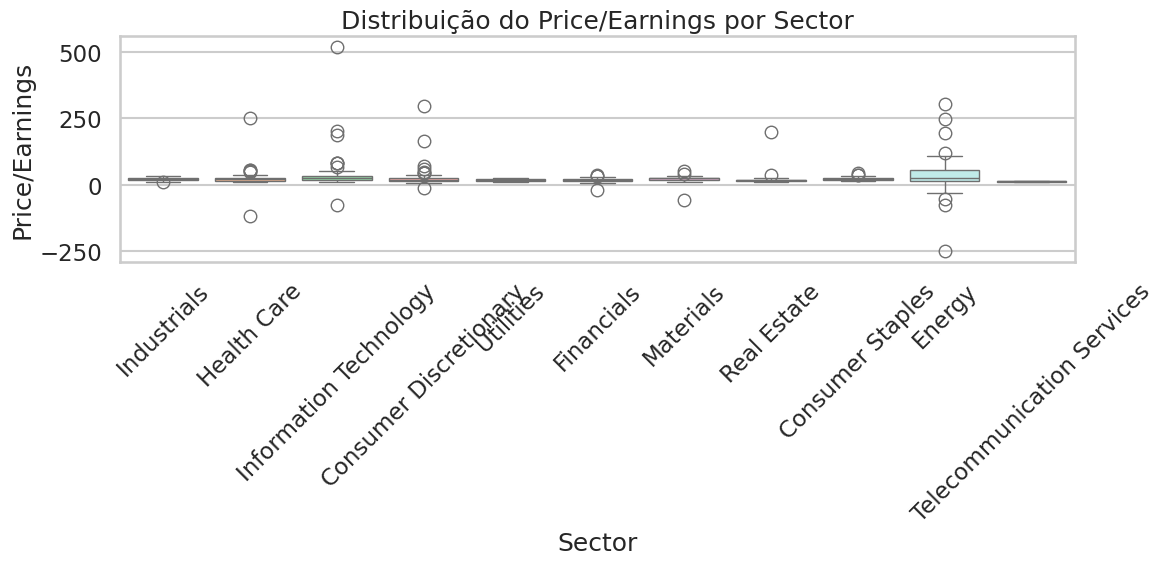

In [ ]:
# Visualização 1: Distribuição do Price/Earnings por Sector
plt.figure(figsize=(12,6))
sns.boxplot(x='Sector', y='Price/Earnings', data=df, palette="pastel")
plt.title('Distribuição do Price/Earnings por Sector')
plt.xlabel('Sector')
plt.ylabel('Price/Earnings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

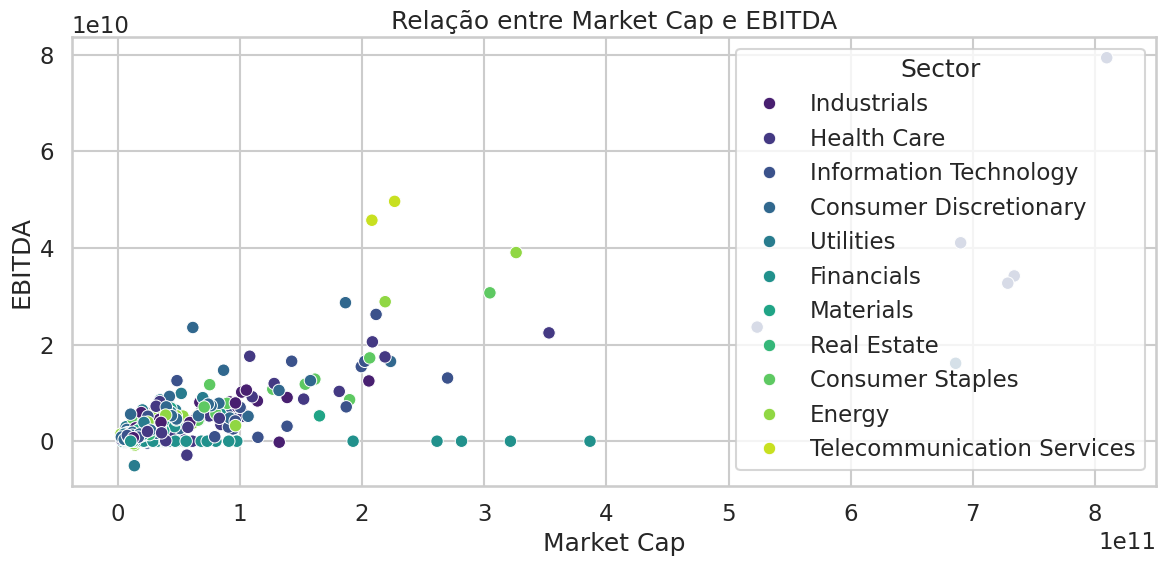

In [ ]:
# Visualização 2: Relação entre Market Cap e EBITDA (por Sector)
plt.figure(figsize=(12,6))
sns.scatterplot(x='Market Cap', y='EBITDA', hue='Sector', data=df, palette="viridis")
plt.title('Relação entre Market Cap e EBITDA')
plt.xlabel('Market Cap')
plt.ylabel('EBITDA')
plt.tight_layout()
plt.show()

In [ ]:
# Normalização da coluna Price/Earnings
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Price/Earnings_norm'] = scaler.fit_transform(df[['Price/Earnings']])

print("\nExemplo de normalização do Price/Earnings:")
print(df[['Price/Earnings', 'Price/Earnings_norm']].head())


Exemplo de normalização do Price/Earnings:
   Price/Earnings  Price/Earnings_norm
0           24.31            -0.012097
1           27.76             0.071641
2           22.51            -0.055786
3           19.41            -0.131029
4           25.47             0.016058


## 4. Conclusão da Análise Exploratória

A análise exploratória permitiu compreender as características dos dados financeiros das empresas do S&P 500.
Foram obtidas estatísticas descritivas, verificados dados faltantes e identificadas distribuições dos indicadores financeiros por sector.
Além disso, foi realizada a normalização da métrica Price/Earnings para facilitar comparações.

Esses insights servirão como base para futuras análises e para a integração com ferramentas de IA para a geração automatizada de resumos e relatórios.